In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

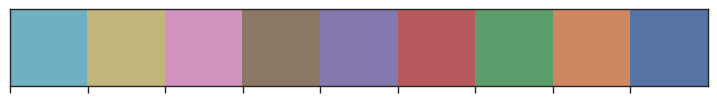

In [3]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 0.8)
colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

sns.palplot(colors)
plt.rcParams['axes.grid'] = True

plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['axes.facecolor'] = 'lightgrey'

plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'white'

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100

plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.fontsize'] = 'large'


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [8]:
analog_freq = np.array([10,20,30,40,50,60,70,80,90,100,120,140,160,180])

dig_hex = np.array(['00001380', '00009c0', '0000680', '00004e0', '00003a8', '0000340', '0000270','0000270', '0000208','00001a0', '00001a0', '0000138', '0000138', '00000d0'])

clk_cycles = np.zeros_like(analog_freq)

for el in range(len(dig_hex)):
    clk_cycles[el] = int(dig_hex[el], 16)

digital_freq = 1/(clk_cycles*2*10**-8)/1000

clk_cycles

array([4992, 2496, 1664, 1248,  936,  832,  624,  624,  520,  416,  416,
        312,  312,  208])

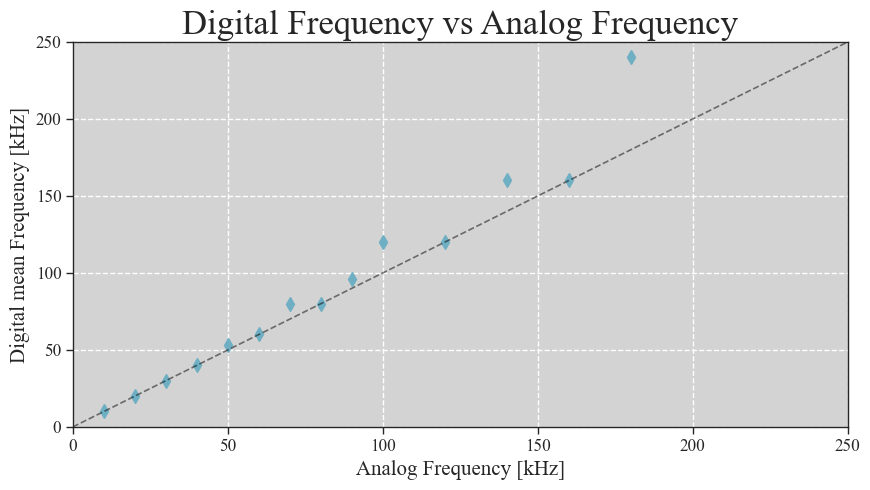

In [9]:
plt.plot(analog_freq, digital_freq, 'd', markersize=7, color=colors[0])
plt.xlabel('Analog Frequency [kHz]', fontsize=15)
plt.ylabel('Digital mean Frequency [kHz]', fontsize=15)
plt.title('Digital Frequency vs Analog Frequency', fontsize=25)


plt.xlim(0, 250)
plt.ylim(0, 250)

def perf_lin(x):
    return x
x_perf = np.linspace(0, 250, 100)
plt.plot(x_perf, perf_lin(x_perf) , '--', color='black', alpha=0.5)
plt.savefig('figures/digi_vs_analog.png', dpi=300, bbox_inches='tight')

In [10]:
def freq(clk):
    freq=1/(2*clk*10**(-8)*1000)
    return freq


extra_points = []
for n in clk_cycles[:2]:
    extra_points.append(np.array((n-1000, n+1000)))
print(extra_points)

[array([3992, 5992]), array([1496, 3496])]


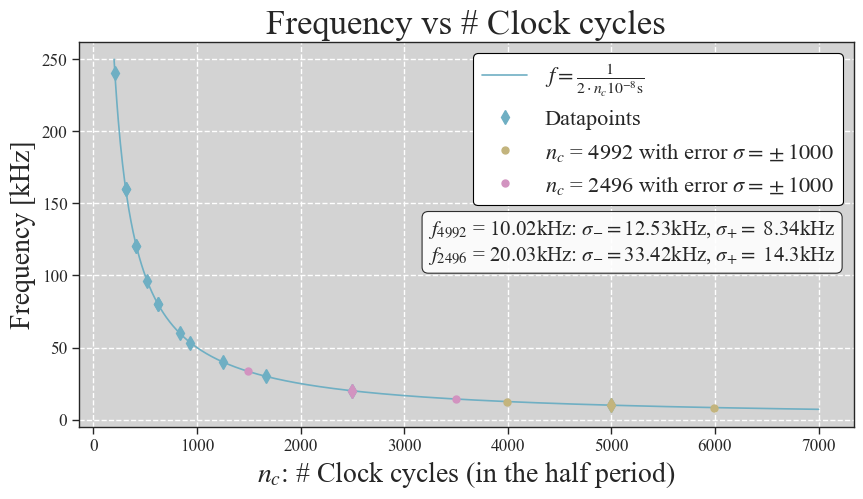

In [12]:
clock = np.linspace(200, 7000, 1000)

frequencies = freq(clock)
plt.plot(clock, frequencies, label = r'$f = \frac{1}{2\cdot n_{c}10^{-8}\text{s}}$', color=colors[0])
plt.plot(clk_cycles, freq(clk_cycles), color=colors[0], marker= 'd', label = 'Datapoints', markersize=7, ls='')
for i, point in enumerate(extra_points):
    plt.plot(point, freq(point), 'o', color=colors[i + 1], label = f'$n_c$ = {clk_cycles[i]} with error $\sigma = \pm 1000$', markersize=5)

plt.plot(clk_cycles[0], freq(clk_cycles[0]), 'd', color=colors[1], markersize=7)
plt.plot(clk_cycles[1], freq(clk_cycles[1]), 'd', color=colors[2], markersize=7)

plt.xlabel('$n_c$: # Clock cycles (in the half period)', fontsize=20)
plt.ylabel('Frequency [kHz]', fontsize=20)
plt.title('Frequency vs # Clock cycles', fontsize=25)
plt.legend()

error1_neg = str(freq(clk_cycles[0]-1000).round(2))
error1_pos = str(freq(clk_cycles[0]+1000).round(2))
error2_neg = str(freq(clk_cycles[1]-1000).round(2))
error2_pos = str(freq(clk_cycles[1]+1000).round(2))

text_1 = r'$f_{4992}$ = ' + str(freq(clk_cycles[0]).round(2)) + 'kHz' + r': $\sigma_{-} = $' + error1_neg + r'kHz, $\sigma_{+} =$ ' + error1_pos + 'kHz' 
text_2 = r'$f_{2496}$ = ' + str(freq(clk_cycles[1]).round(2)) + 'kHz' + r': $\sigma_{-} = $' + error2_neg + r'kHz, $\sigma_{+} =$ ' + error2_pos + 'kHz'
joined_str = '\n'.join([text_1, text_2])

# set properties for the text box


plt.text(5200, 123, joined_str, fontsize=15, bbox=dict(facecolor='white', alpha=0.9, boxstyle='round', edgecolor='k'), ha='center', va='center' )


plt.savefig('figures/freq_vs_clk.png', dpi=300, bbox_inches='tight')
